(HW2_2024)=
# HW2

**Deadline:** 03.11.2024 23:59 (GMT+5).

In this task you are suggested to implement gradient descent and Newton's optimization methods, and investigate their performance for three types of functions:

* quadratic function
* loss function of linear regression
* loss function of logistic regression

`BaseSmoothOracle` is an abstract class for objective function $f$ (**oracle**). Each concrete oracle must inherit this class, implementing four methods:

* `func(x)` calculates $f(\boldsymbol x)$
* `grad(x)` calculates $\nabla f(\boldsymbol x)$
* `hess(x)` calculates $\nabla^2 f(\boldsymbol x)$
* `get_opt(x)` calculates point of minimum by direct formula (works only for quadratic and linear regression oracles)

In [ ]:
class BaseSmoothOracle(object):
    """
    Base class for implementation of oracles.
    """
    def func(self, x):
        """
        Computes the value of function at point x.
        """
        raise NotImplementedError('Func oracle is not implemented.')

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        raise NotImplementedError('Grad oracle is not implemented.')

    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        raise NotImplementedError('Hessian oracle is not implemented.')

    def get_opt(self):
        """
        Computes the point x at which minimum is attained
        """
        raise NotImplementedError('True solution is unavailable.')

## Quadratic oracle

### Task 2.1 (1 point)

Implement quadratic oracle

```{math}
:label: quadratic-oracle
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T} \boldsymbol x, \quad \boldsymbol A^\mathsf{T}  = \boldsymbol A \in \mathbb R^{n\times n}, \quad \boldsymbol b\in\mathbb R^n
```

<!-- Let $\boldsymbol A$ be a symmetric positive definite matrix. Solve the optimization task

$$
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T}\boldsymbol x \to \min\limits_{\boldsymbol x \in \mathbb R^n}
$$

analytically. Namely, -->

Namely,

* find solution $\boldsymbol x_*$ of the equation $\nabla f(\boldsymbol x) = \boldsymbol 0$
* find hessian $\nabla^2 f$ and show that $\nabla^2 f(\boldsymbol x_*)$ is positive definite
* prove that $\boldsymbol x_*$ is the point of global minimum of $f$
* finally, fill the gaps in cell below

In [ ]:
import numpy as np

class QuadraticOracle(BaseSmoothOracle):
    """
    Oracle for quadratic function:
       func(x) = 1/2 x^TAx - b^Tx.
    """

    def __init__(self, A, b):
        """
        Initialize the quadratic oracle with matrix A and vector b.
        Ensure that A is symmetric, as required for quadratic functions.
        """
        if not np.allclose(A, A.T):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        """
        Compute the value of the quadratic function at point x.
        f(x) = 1/2 * x^T * A * x - b^T * x
        """
        return 0.5 * np.dot(x.T, np.dot(self.A, x)) - np.dot(self.b, x)

    def grad(self, x):
        """
        Compute the gradient of the quadratic function.
        grad(f) = A * x - b
        """
        return np.dot(self.A, x) - self.b

    def hess(self, x):
        """
        Return the constant Hessian matrix A.
        """
        return self.A


    def get_opt(self):
        """
        Compute the optimal point x* = A^(-1) * b.
        """
        return np.linalg.solve(self.A, self.b)


Plot levels of the quadraric oracle in 2-dimensional case using the following function:

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_levels(func, xrange=None, yrange=None, levels=None):
    """
    Plotting the contour lines of the function.

    Example:
    --------
    >> oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
    >> plot_levels(oracle.func)
    """
    if xrange is None:
        xrange = [-6, 6]
    if yrange is None:
        yrange = [-5, 5]
    if levels is None:
        levels = [0, 0.25, 1, 4, 9, 16, 25]

    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    CS = plt.contour(X, Y, Z, levels=levels, colors='k')
    plt.clabel(CS, inline=1, fontsize=8)
    plt.grid()

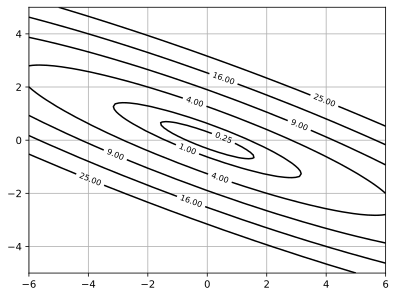

In [ ]:
A = np.array([[1.0, 2.0], [2.0, 5.0]])
b = np.zeros(2)
oracle = QuadraticOracle(A, b)

plot_levels(oracle.func)

## Linear regression oracle

### Task 2.2 (1.5 points)

Implement linear regression oracle

$$
    f(\boldsymbol x) = \frac 1m \Vert \boldsymbol{Ax} - \boldsymbol b\Vert_2^2, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol b \in \mathbb R^n.
$$

Namely,

* find $\nabla f(\boldsymbol x)$
* find $\nabla^2 f(\boldsymbol x)$
* find analytic solution of the minimization problem $f(\boldsymbol x) \to \min\limits_{\boldsymbol x}$
* finally, fill the gaps in the next cell

In [ ]:
class LinRegOracle(BaseSmoothOracle):
    """
    Oracle for linear regression:
       func(x) = 1/m ||Ax - b||^2.
    """

    def __init__(self, A, b):
        # Initialize the oracle with matrix A and vector b
        self.A = A
        self.b = b

    def func(self, x):
        # Calculate the objective function: f(x) = (1/2m) * ||Ax - b||^2
        residual = self.A @ x - self.b  # Compute the residual (Ax - b)
        return (residual.T @ residual) / (2 * len(self.b))  # Return the average squared error

    def grad(self, x):
        # Calculate the gradient: ∇f(x) = (A.T @ (Ax - b)) / m
        return self.A.T @ (self.A @ x - self.b) / len(self.b)  # Gradient of the objective function

    def hess(self, x):
        # Calculate the Hessian: ∇^2f(x) = (A.T @ A) / m
        return (self.A.T @ self.A) / len(self.b)  # Hessian matrix of the objective function

    def get_opt(self):
        # Find the analytic solution: x_opt = (A.T @ A)^(-1) @ A.T @ b
        return np.linalg.solve(self.A.T @ self.A, self.A.T @ self.b)  # Optimal solution for linear regression

In [ ]:
#testing
import numpy as np

# Create a sample A matrix (features) and b vector (target values)
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([1, 2, 3])

# Initialize LinRegOracle with A and b
oracle = LinRegOracle(A, b)

# Choose an initial x (parameters) for testing
x_initial = np.array([0.1, 0.2])

print("Objective function (f(x)):", oracle.func(x_initial))
print("Gradient (∇f(x)):", oracle.grad(x_initial))
print("Hessian (∇²f(x)):", oracle.hess(x_initial))
print("Optimal solution (x*):", oracle.get_opt())

Objective function (f(x)): 0.4583333333333332
Gradient (∇f(x)): [-3.23333333 -4.13333333]
Hessian (∇²f(x)): [[11.66666667 14.66666667]
 [14.66666667 18.66666667]]
Optimal solution (x*): [0.  0.5]


## Logistic regression oracle

### Task 2.3 (1.5 point)

Implement logistic regression oracle

```{math}
:label: log-reg-oracle
    f(\boldsymbol x) = \frac 1m \sum_{i=1}^m \log\big(1 + \exp(-b_i\boldsymbol a_i^\mathsf{T} \boldsymbol x)\big) + \frac C2\Vert \boldsymbol x\Vert_2^2
```

Namely, denote

$$
    \boldsymbol A = \begin{pmatrix} a_1^\mathsf{T} \\
    a_2^\mathsf{T} \\
    \vdots\\
    a_m^\mathsf{T}
    \end{pmatrix} \in \mathbb R^{m\times n}, \quad
    \boldsymbol b = \begin{pmatrix} b_1 \\
    b_2\\
    \vdots\\
    b_m
    \end{pmatrix}\in \mathbb R^m,
    \quad
    \boldsymbol x = \begin{pmatrix} x_1 \\
    x_2\\
    \vdots\\
    x_n
    \end{pmatrix}\in \mathbb R^n,
$$

and then

* find the gradient $\nabla f(\boldsymbol x)$ and hessian $\nabla^2 f(\boldsymbol x)$ of logistic regression oracle {eq}`log-reg-oracle` in matrix-vector form
* fill the gaps in the cell below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.special import expit

class LogRegOracle(BaseSmoothOracle):
    """
    Oracle for logistic regression.
    """

    def __init__(self, A, b, regcoef=1):
        self.A = A
        self.b = b
        self.C = regcoef

    def func(self, x):
        """
        Logistic regression objective function:
        f(x) = (1/m) * sum(log(1 + exp(-b_i * (A_i^T * x)))) + (C/2) * ||x||^2
        """
        # Compute the linear term: A @ x
        linear_term = self.A.dot(x)
        # Compute the loss term using log(1 + exp(-b * (A @ x)))
        loss = np.mean(np.log(1 + np.exp(-self.b * linear_term)))
        # Regularization term: (C / 2) * ||x||^2
        reg_term = (self.C / 2) * np.linalg.norm(x)**2
        return loss + reg_term

    def grad(self, x):
        """
        Gradient of the logistic regression objective function.
        """
        # Compute the sigmoid of -b * (A @ x)
        sigmoid_values = expit(-self.b * (self.A.dot(x)))
        # Gradient: -(1/m) * sum(b * A * sigmoid(-b * A @ x)) + C * x
        grad = -(self.A.T.dot(self.b * sigmoid_values)) / self.A.shape[0] + self.C * x
        return grad

    def hess(self, x):
        """
        Hessian of the logistic regression objective function.
        """
        # Compute the sigmoid and its derivative (sigmoid * (1 - sigmoid))
        sigmoid_values = expit(self.b * (self.A.dot(x)))
        D = np.diag(sigmoid_values * (1 - sigmoid_values))
        # Hessian: A^T * D * A / m + C * I
        hessian = self.A.T.dot(D).dot(self.A) / self.A.shape[0] + self.C * np.eye(self.A.shape[1])
        return hessian

    def get_opt(self):
        """
        Since there is no analytic solution for the optimal weights of logistic regression,
        here we have to cheat a bit
        """
        LR = LogisticRegression(fit_intercept=False, C= 1./self.C/self.A.shape[0])
        LR.fit(self.A, (self.b + 1) / 2)
        return LR.coef_[0]

In [ ]:
# Sample data
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([1, -1, 1])

# Initialize LogRegOracle
oracle = LogRegOracle(A, b, regcoef=1)

x_initial = np.array([0.1, 0.2])
print("Objective function (f(x)):", oracle.func(x_initial))
print("Gradient (∇f(x)):", oracle.grad(x_initial))
print("Hessian (∇²f(x)):", oracle.hess(x_initial))
print("Optimal solution (x*):", oracle.get_opt())

Objective function (f(x)): 0.7013994462272679
Gradient (∇f(x)): [0.46697111 0.6397225 ]
Hessian (∇²f(x)): [[2.72882543 2.21220613]
 [2.21220613 3.87991327]]
Optimal solution (x*): [0.04692147 0.09124771]


## Gradient descent

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.4 (1 point)

Complete the implementation of gradient descent algorithm.

In [ ]:
from datetime import datetime
import numpy as np
from collections import defaultdict

def gradient_descent(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=10000,
                     trace=False, display=False):
    """
    Gradient descent optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively.
    x_0 : np.array
        Starting point for optimization algorithm.
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format and is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        "success" or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = gradient_descent(oracle, np.zeros(5))
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    start_time = datetime.now()

    INF = 1e100

    for i in range(max_iter):
        grad_at_x_k = oracle.grad(x_k)
        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            elapsed_time = (datetime.now() - start_time).total_seconds()
            history['time'].append(elapsed_time)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # Stop if gradient norm is below tolerance
        if np.linalg.norm(grad_at_x_k) <= tolerance:
            return x_k, 'success', history

        # Update x_k using gradient descent step
        x_k -= learning_rate * grad_at_x_k

    # If max iterations exceeded
    return x_k, 'iterations_exceeded', history


Now it's try to test gradient descent algorithm on different tasks. Here is some auxiliary code for visualization.

In [ ]:
import colorsys

def get_color_array(size):
    HSV_tuples = [(float(i) / size, 1.0, 1.0) for i in range(size)]
    RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    return np.array(RGB_tuples)

def plot_2d(history, oracle, x_0, x_opt, scale, title, n_levels=3, xlims=None, ylims=None, bound=None):
    if bound is not None:
        history['x'] = history['x'][:bound]
    hist_x = np.array(history['x']).T
    plt.figure(figsize=(12, 5))
    plt.subplot(121)

    plt.plot(np.linalg.norm(hist_x - x_opt[:, None], axis=0), c='c', linewidth=3)
    plt.plot(history['grad_norm'], c='m', linewidth=2)
    plt.xlim(0, len(history['grad_norm']) - 1)
    plt.ylim(0, 2)
    plt.title(title)
    plt.ylabel('Gradients/residuals norm')
    plt.xlabel('Iteration')
    plt.legend(['Residuals', 'Gradients'])
    plt.grid(ls=":")

    plt.subplot(122)
    if xlims is not None:
        x_range = xlims
    else:
        x_range = [x_opt[0] - scale, x_opt[0] + scale]
    if ylims is not None:
        y_range = ylims
    else:
        y_range = [x_opt[1] - scale, x_opt[1] + scale]
    func_opt = oracle.func(x_opt)
    levels = [func_opt + 0.25 * scale / n_levels * i for i in range(1, 4*n_levels + 1, 4)]
    # sizes = np.minimum(5 * float(hist_x.shape[1]) / (np.arange(1, hist_x.shape[1] + 1)), 20)
    plt.scatter(hist_x[0], hist_x[1], s=8, c=get_color_array(hist_x.shape[1]))
    plt.plot(hist_x[0], hist_x[1], alpha=0.6, ls="--", c='r')
    # plt.plot(hist_x[0], hist_x[1], c='r', linewidth=3)
    plt.scatter(x_opt[0], x_opt[1], marker='s', c='r', edgecolors='k')
    plot_levels(oracle.func, xrange=x_range, yrange=y_range, levels=levels)
    plt.title('Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(ls=":")
    if xlims is not None:
        plt.xlim(xlims)
    if ylims is not None:
        plt.ylim(ylims)
    plt.show()

def test_2d(method, oracle, x_0, lr, tol=1e-5, scale=1.0, xlims=None, ylims=None, bound=None):
    x_opt = oracle.get_opt()
    if method == 'gd':
        x_star, msg, history = gradient_descent(
            oracle, x_0, lr, tol, trace=True
        )
    elif method == 'newton':
        x_star, msg, history = newton(
            oracle, x_0, lr, tol, trace=True
        )
    else:
        raise ValueError("Unknown error")
    print(msg, len(history['grad_norm']), "iterations")
    plot_2d(history, oracle, x_0, x_opt, scale, 'lr = {}'.format(lr), xlims=xlims, ylims=ylims, bound=bound)

Take a simple quadratic function

$$
    f(x, y) = 2x^2 + 4xy + 5 y^2
$$

which ovbiously has minimum at $(0, 0)$. Now run gradient descent method with $\eta = 0.01$, starting from point $(-2, -1)$:

success 1176 iterations


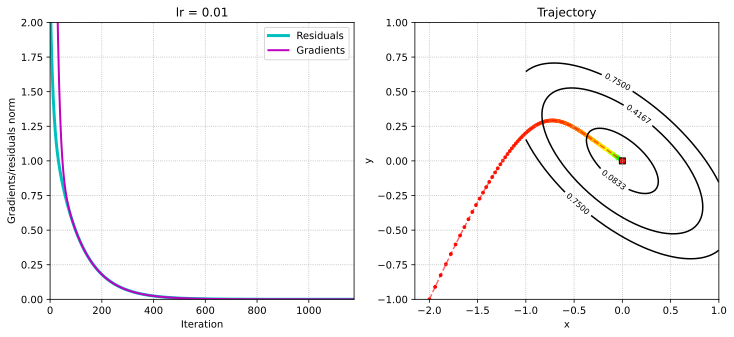

In [ ]:
import numpy as np

A = np.array([[2, 2], [2, 5]])
b = np.zeros(2)
q_oracle = QuadraticOracle(A, b)
test_2d("gd", q_oracle, np.array([-2.0, -1.0]), lr=0.01)

If you did all correctly, gradient descent should converge here to optimal point. But this is not always the case:

* if $\eta$ is very small, convergence could be too slow
* if $\eta$ is very big, than gradient descent often diverges

### Task 2.5 (1 point)

Take previous quadratic oracle and try different learning rates and starting points. Find the smallest and the largest learning rates for which gradient descent is still convergent. Provide some characteristic plots. Also, plot a graph of required iterations versus $\eta$.

### GD for linear regression

Let's try it for simple linear regression. Here is a toy example:

success 1772 iterations


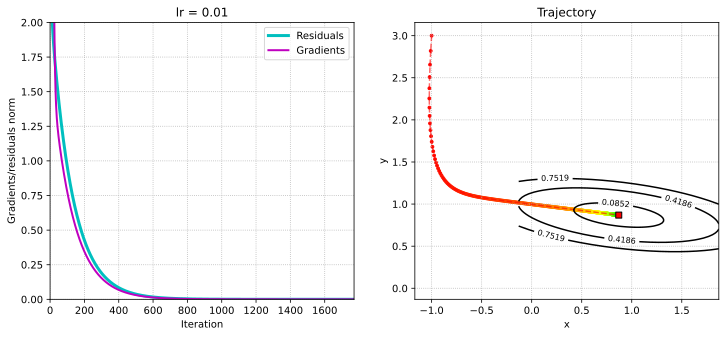

In [ ]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8]])
b = np.array([-1, 2, 5])
oracle = LinRegOracle(A, b)
test_2d("gd", oracle, np.array([-1, 3.0]), lr=0.01, tol=1e-6)

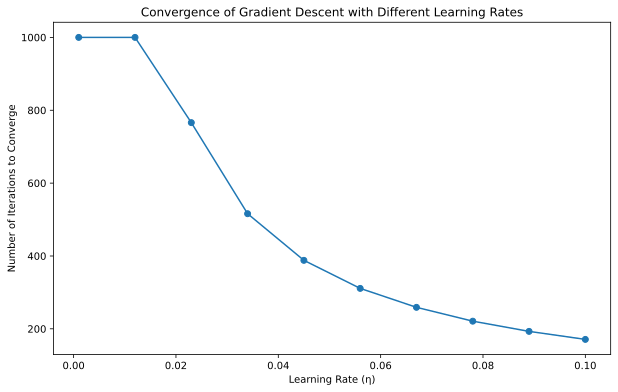

In [ ]:


# Lists to store results
learning_rates = np.linspace(0.001, 0.1, 10)  # Range of learning rates to test
iterations_list = []

# Custom gradient descent function for tracking iterations
def custom_gradient_descent(oracle, start_point, lr, tol=1e-6, max_iter=1000):
    x = start_point
    for i in range(max_iter):
        grad = oracle.grad(x)
        x = x - lr * grad
        if np.linalg.norm(grad) < tol:
            return i  # Return the iteration count if convergence is reached
    return max_iter  # Return max_iter if convergence was not reached

# Experiment with different learning rates
for lr in learning_rates:
    iterations = custom_gradient_descent(oracle, np.array([-1, 3.0]), lr, tol=1e-6)
    iterations_list.append(iterations)

# Plotting the graph of learning rate vs required iterations
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, iterations_list, marker='o')
plt.xlabel("Learning Rate (η)")
plt.ylabel("Number of Iterations to Converge")
plt.title("Convergence of Gradient Descent with Different Learning Rates")
plt.show()



### Task 2.6 (0.5 points)

Apply gradient descent algorithm to simple linear regression trained on `boston` dataset. Take `lstat` as feature, `medv` as target. Provide some visualizations.

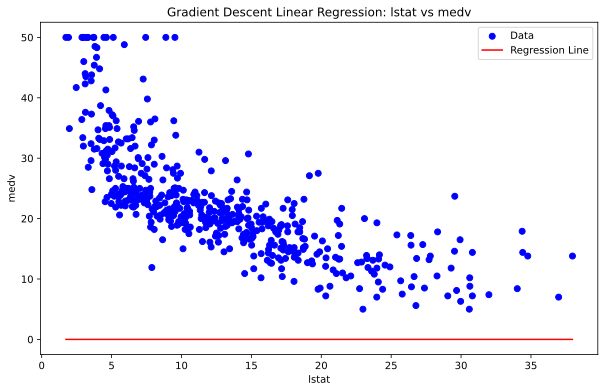

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

# Adjust code if necessary
#boston = boston.drop("Unnamed: 0", axis=1)  # Uncomment if you find this column in the data


# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt

# Extract features and target
X = boston['lstat'].values.reshape(-1, 1)  # Feature
y = boston['medv'].values  # Target

# Normalize the feature for better gradient descent performance
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Parameters for gradient descent
learning_rate = 0.01
iterations = 1000
m = X.shape[0]  # Number of examples

# Initialize weights and bias
theta = np.zeros(1)
bias = 0

# Gradient Descent
for i in range(iterations):
    y_pred = X.dot(theta) + bias  # Linear model
    d_theta = (-2/m) * np.sum(X * (y - y_pred))  # Derivative with respect to theta
    d_bias = (-2/m) * np.sum(y - y_pred)         # Derivative with respect to bias

    theta -= learning_rate * d_theta
    bias -= learning_rate * d_bias

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(boston['lstat'], boston['medv'], color='blue', label='Data')
plt.plot(boston['lstat'], boston['lstat'] * theta + bias, color='red', label='Regression Line')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Gradient Descent Linear Regression: lstat vs medv')
plt.legend()
plt.show()


In [ ]:
import numpy as np

class LogRegOracle:
    def __init__(self, A, b):
        self.A = A
        self.b = b

    def cost(self, x):
        # Logistic regression cost function
        z = self.A.dot(x)
        log_likelihood = np.sum(np.log(1 + np.exp(-self.b * z)))
        return log_likelihood / len(self.b)

    def gradient(self, x):
        # Gradient of the cost function
        z = self.A.dot(x)
        grad = -np.dot(self.A.T, self.b * (1 / (1 + np.exp(self.b * z))))
        return grad / len(self.b)


In [ ]:
def test_2d(optimizer, oracle, x_init, lr=0.01, tol=1e-6):
    x = x_init
    iterations = 0

    while True:
        # Compute gradient
        grad = oracle.gradient(x)

        # Update step
        x = x - lr * grad

        # Check convergence (using the norm of the gradient)
        if np.linalg.norm(grad) < tol:
            break

        iterations += 1

    print(f"Success: {iterations} iterations")


### GD for logistic regression

The targets must be from $\{-1, 1\}$. One more toy example:

In [ ]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8], [1, 3.4]])
b = np.array([-1, 1, 1, 1])
oracle = LogRegOracle(A, b)
test_2d("gd", oracle, np.array([1., 2.0]), lr=0.01, tol=1e-6)

Success: 66441193 iterations


### Task 2.7 (0.5 points)

Train simple logistic regression model on `breast_cancer` dataset using your gradient descent method. Take any feature from the dataset. Visualize the results.

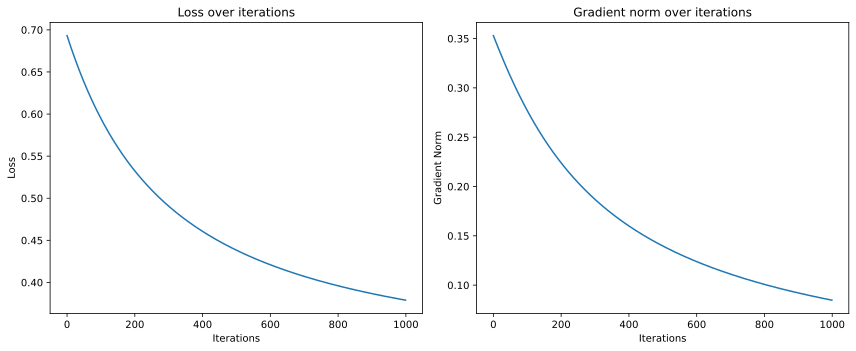

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset and preprocess
breast = load_breast_cancer()
X = breast['data'][:, :1]  # Selecting the first feature for simplicity
y = breast['target']
y = np.where(y == 0, -1, 1)  # Convert labels from {0, 1} to {-1, 1}

# Standardize the feature for better performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the logistic regression oracle (cost function and gradient)
class LogisticRegressionOracle:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def func(self, w):
        z = self.y * (self.X @ w)
        return np.mean(np.log(1 + np.exp(-z)))

    def grad(self, w):
        z = self.y * (self.X @ w)
        sigmoid = 1 / (1 + np.exp(-z))
        grad = -(self.X.T @ ((1 - sigmoid) * self.y)) / len(self.y)
        return grad

# Implement gradient descent function
def gradient_descent(oracle, w_0, lr=0.01, tol=1e-6, max_iter=1000, trace=False):
    w = w_0
    history = {'loss': [], 'gradient_norm': []}

    for _ in range(max_iter):
        loss = oracle.func(w)
        gradient = oracle.grad(w)
        gradient_norm = np.linalg.norm(gradient)

        if trace:
            history['loss'].append(loss)
            history['gradient_norm'].append(gradient_norm)

        if gradient_norm < tol:
            break

        w = w - lr * gradient

    return w, "Converged", history

# Initialize parameters
w_0 = np.zeros((X.shape[1],))
learning_rate = 0.01
tolerance = 1e-6

# Train model with gradient descent
oracle = LogisticRegressionOracle(X, y)
w_star, message, history = gradient_descent(oracle, w_0, learning_rate, tolerance, trace=True)

# Plot the loss and gradients over iterations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title("Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history['gradient_norm'])
plt.title("Gradient norm over iterations")
plt.xlabel("Iterations")
plt.ylabel("Gradient Norm")

plt.tight_layout()
plt.show()



## Newton's method

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \big(\nabla^2 f(\boldsymbol x_k)\big)^{-1} \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.8 (1 point)

Complete the implementation of Newton's method.

In [ ]:
import scipy

def newton(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=100, trace=False, display=False):
    """
    Newton's optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively. If the Hessian
        returned by the oracle is not positive-definite method stops with message="newton_direction_error"
    x_0 : np.array
        Starting point for optimization algorithm
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'newton_direction_error': in case of failure of solving linear system with Hessian matrix (e.g. non-invertible matrix).
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = newton(oracle, np.zeros(5), line_search_options={'method': 'Constant', 'c': 1.0})
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):
        grad_at_x_k = oracle.grad(x_k)
        hess_at_x_k = oracle.hess(x_k)

        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).seconds)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # YOUR CODE HERE
        if np.linalg.norm(grad_at_x_k)**2 <= tolerance * np.linalg.norm(grad_at_x_0)**2:
            return x_k, 'success', history

        # Compute the Newton step
        try:
            newton_step = np.linalg.solve(hess_at_x_k, grad_at_x_k)
            x_k = x_k - learning_rate * newton_step
        except np.linalg.LinAlgError:
            return x_k, 'newton_direction_error', history

    return x_k, 'iterations_exceeded', history

iteration 0: |x_k-x_0| = 0.0, f(x_k) = 0.0, |grad(f(x_k))| = 2.23606797749979
iteration 1: |x_k-x_0| = 2.0275875100994063, f(x_k) = -2.1666666666666665, |grad(f(x_k))| = 0.0

Optimization Result:
Optimal point (x*): [0.33333333 2.        ]
Message: success
Number of iterations: 2


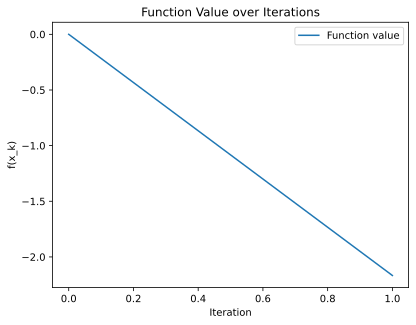

In [ ]:
import numpy as np

class QuadraticOracle:
    """ Oracle for the quadratic function f(x) = 0.5 * x^T A x - b^T x """
    def __init__(self, A, b):
        self.A = A
        self.b = b

    def func(self, x):
        return 0.5 * x.T @ self.A @ x - self.b.T @ x

    def grad(self, x):
        return self.A @ x - self.b

    def hess(self, x):
        return self.A

# Set up a test case
A = np.array([[3, 0], [0, 1]])  # Positive definite matrix
b = np.array([1, 2])
oracle = QuadraticOracle(A, b)

# Initial point, learning rate, and tolerance
x_0 = np.array([0.0, 0.0])
learning_rate = 1.0
tolerance = 1e-5

# Run Newton's method
x_opt, message, history = newton(oracle, x_0, learning_rate, tolerance, max_iter=100, trace=True, display=True)

# Output results
print("\nOptimization Result:")
print("Optimal point (x*):", x_opt)
print("Message:", message)
print("Number of iterations:", len(history['func']) if history else 'N/A')

# Plotting (if matplotlib is available)
import matplotlib.pyplot as plt

# Plot the function values if history tracking was enabled
if history:
    plt.plot(history['func'], label='Function value')
    plt.xlabel('Iteration')
    plt.ylabel('f(x_k)')
    plt.title('Function Value over Iterations')
    plt.legend()
    plt.show()


### Task 2.9 (1 point)

Apply Newton's methods to the previous tasks:

* quadratic function
* simple linear regression trained on `boston` dataset
* simple logistic regression trained on `breast_cancer` dataset

Compare the number of iterations and time execution of GD and Newton methods in this examples. Visualize your results.

<ipython-input-21-cbfda861498d>:61: RuntimeWarning: overflow encountered in matmul
  return X.T @ (X @ theta - y) / len(y)
<ipython-input-21-cbfda861498d>:69: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * linear_gradient(theta, X, y)
<ipython-input-21-cbfda861498d>:106: RuntimeWarning: overflow encountered in exp
  preds = 1 / (1 + np.exp(-X.dot(theta)))
<ipython-input-21-cbfda861498d>:125: RuntimeWarning: overflow encountered in exp
  preds = 1 / (1 + np.exp(-X.dot(theta)))


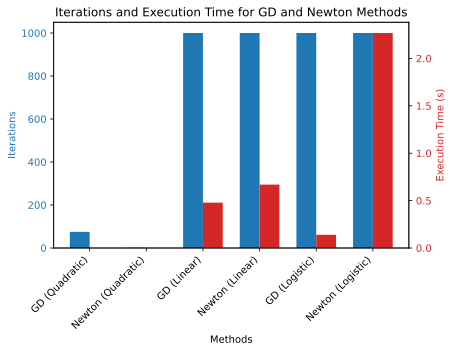

In [ ]:
# Install necessary packages
!pip install numpy scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
import time

# Function for quadratic function optimization
def quadratic_function(x):
    return x ** 2

def gradient(x):
    return 2 * x

# Gradient Descent for the quadratic function
def gradient_descent_quadratic(start, learning_rate=0.1, tol=1e-6, max_iter=1000):
    x = start
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        x -= learning_rate * gradient(x)
        if abs(gradient(x)) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return x, iterations, exec_time

# Newton's Method for the quadratic function
def newton_method_quadratic(start, tol=1e-6, max_iter=1000):
    x = start
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        grad_val = gradient(x)
        hessian_val = 2  # The second derivative is constant

        x -= grad_val / hessian_val

        if abs(grad_val) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return x, iterations, exec_time

# Load California housing dataset for linear regression
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression Gradient Descent
def linear_gradient(theta, X, y):
    return X.T @ (X @ theta - y) / len(y)

def gradient_descent_linear(X, y, initial_theta, learning_rate=0.01, tol=1e-6, max_iter=1000):
    theta = initial_theta
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        theta -= learning_rate * linear_gradient(theta, X, y)
        if np.linalg.norm(linear_gradient(theta, X, y)) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return theta, iterations, exec_time

# Newton's Method for Linear Regression
def linear_newton_method(X, y, initial_theta, tol=1e-6, max_iter=1000):
    theta = initial_theta
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        grad = linear_gradient(theta, X, y)
        hess = (X.T @ X) / len(y)

        try:
            theta -= np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            theta -= np.linalg.pinv(hess) @ grad

        if np.linalg.norm(grad) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return theta, iterations, exec_time

# Load breast cancer dataset for logistic regression
cancer = load_breast_cancer()
X_c = cancer.data
y_c = cancer.target

# Logistic Regression Gradient Descent
def logistic_gradient(theta, X, y):
    preds = 1 / (1 + np.exp(-X.dot(theta)))
    return X.T @ (preds - y) / len(y)

def logistic_gradient_descent(X, y, initial_theta, learning_rate=0.01, tol=1e-6, max_iter=1000):
    theta = initial_theta
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        theta -= learning_rate * logistic_gradient(theta, X, y)
        if np.linalg.norm(logistic_gradient(theta, X, y)) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return theta, iterations, exec_time

# Newton's Method for Logistic Regression
def logistic_hessian(X, theta):
    preds = 1 / (1 + np.exp(-X.dot(theta)))
    return (X.T @ np.diag(preds * (1 - preds)) @ X) / len(X)

def logistic_newton_method(X, y, initial_theta, tol=1e-6, max_iter=1000):
    theta = initial_theta
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        grad = logistic_gradient(theta, X, y)
        hess = logistic_hessian(X, theta)

        try:
            theta -= np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            theta -= np.linalg.pinv(hess) @ grad

        if np.linalg.norm(grad) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return theta, iterations, exec_time

# Run experiments
# Quadratic function
gd_quad_result = gradient_descent_quadratic(start=10)
newton_quad_result = newton_method_quadratic(start=10)

# Linear regression on California housing dataset
initial_theta_linear = np.zeros(X_train.shape[1])
gd_lr_result = gradient_descent_linear(X_train, y_train, initial_theta_linear)
newton_lr_result = linear_newton_method(X_train, y_train, initial_theta_linear)

# Logistic regression on breast cancer dataset
initial_theta_logistic = np.zeros(X_c.shape[1])
gd_lr_result_logistic = logistic_gradient_descent(X_c, y_c, initial_theta_logistic)
newton_lr_result_logistic = logistic_newton_method(X_c, y_c, initial_theta_logistic)

# Collect results for visualization
methods = ['GD (Quadratic)', 'Newton (Quadratic)',
           'GD (Linear)', 'Newton (Linear)',
           'GD (Logistic)', 'Newton (Logistic)']

iterations = [gd_quad_result[1], newton_quad_result[1],
              gd_lr_result[1], newton_lr_result[1],
              gd_lr_result_logistic[1], newton_lr_result_logistic[1]]

exec_times = [gd_quad_result[2], newton_quad_result[2],
               gd_lr_result[2], newton_lr_result[2],
               gd_lr_result_logistic[2], newton_lr_result_logistic[2]]

# Plot results
x = np.arange(len(methods))
width = 0.35

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Methods')
ax1.set_ylabel('Iterations', color=color)
ax1.bar(x - width/2, iterations, width, label='Iterations', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Execution Time (s)', color=color)
ax2.bar(x + width/2, exec_times, width, label='Execution Time', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(x)
ax1.set_xticklabels(methods, rotation=45, ha='right')
fig.tight_layout()
plt.title('Iterations and Execution Time for GD and Newton Methods')
plt.show()


## GD vs Newton

### Task 2.10 (1 point)

Run both gradient descent and Newton's methods on **full** `boston` and `breast_cancer` datasets. Do they converge? How many iterations are required for convergence? How much time? Justify your answers by numeric experiments and visualizations.

In [ ]:
import numpy as np
import time
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
bc = load_breast_cancer()
X_bc = bc.data
y_bc = bc.target

# Add intercept term to features
X_bc = np.hstack((np.ones((X_bc.shape[0], 1)), X_bc))

# Gradient for logistic regression
def logistic_gradient(theta, X, y):
    predictions = 1 / (1 + np.exp(-X @ theta))
    return X.T @ (predictions - y) / len(y)

# Hessian for logistic regression
def logistic_hessian(X, theta):
    predictions = 1 / (1 + np.exp(-X @ theta))
    diag = predictions * (1 - predictions)
    # Use matrix multiplication with np.diag
    return (X.T @ np.diag(diag)) @ X / len(y)

# Gradient Descent for Logistic Regression
def logistic_gradient_descent(X, y, initial_theta, tol=1e-6, max_iter=1000):
    theta = initial_theta
    iterations = 0
    start_time = time.time()

    for _ in range(max_iter):
        grad = logistic_gradient(theta, X, y)
        theta -= grad

        if np.linalg.norm(grad) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return theta, iterations, exec_time

# Newton's Method for Logistic Regression
def logistic_newton_method(X, y, initial_theta, tol=1e-6, max_iter=1000):
    theta = initial_theta
    iterations = 0
    start_time = time.time()

    while iterations < max_iter:
        grad = logistic_gradient(theta, X, y)
        hess = logistic_hessian(X, theta)

        # Use pseudo-inverse if Hessian is singular
        try:
            theta -= np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            theta -= np.linalg.pinv(hess) @ grad

        if np.linalg.norm(grad) < tol:
            break
        iterations += 1

    exec_time = time.time() - start_time
    return theta, iterations, exec_time

# Initial theta for both methods
initial_theta_bc = np.zeros(X_bc.shape[1])

# Run Gradient Descent and Newton's Method on Breast Cancer dataset
gd_bc_result = logistic_gradient_descent(X_bc, y_bc, initial_theta_bc)
newton_bc_result = logistic_newton_method(X_bc, y_bc, initial_theta_bc)

# Output results
print("Gradient Descent: Final Theta:", gd_bc_result[0], "Iterations:", gd_bc_result[1], "Time:", gd_bc_result[2])
print("Newton's Method: Final Theta:", newton_bc_result[0], "Iterations:", newton_bc_result[1], "Time:", newton_bc_result[2])


<ipython-input-22-5c21f17ff34e>:15: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ theta))
<ipython-input-22-5c21f17ff34e>:20: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X @ theta))


Gradient Descent: Final Theta: [ 3.97569813e+01  3.03369870e+02  4.19563540e+02  1.76695676e+03
  7.42015647e+02  2.81875406e+00 -1.14072600e+00 -5.39027989e+00
 -2.29831159e+00  5.35683165e+00  2.23430859e+00  1.02054123e+00
  2.75451991e+01 -9.33264418e+00 -7.81302640e+02  1.49234910e-01
 -3.55778671e-01 -6.74718340e-01 -8.36199406e-02  4.65388727e-01
  3.23563374e-02  3.21321499e+02  5.31884390e+02  1.79443599e+03
 -1.00730696e+03  3.53389126e+00 -5.13801780e+00 -1.10753798e+01
 -2.53830959e+00  7.36379262e+00  2.09485352e+00] Iterations: 1000 Time: 0.0966954231262207
Newton's Method: Final Theta: [ 3.97569813e+01  3.03369870e+02  4.19563540e+02  1.76695676e+03
  7.42015647e+02  2.81875406e+00 -1.14072600e+00 -5.39027989e+00
 -2.29831159e+00  5.35683165e+00  2.23430859e+00  1.02054123e+00
  2.75451991e+01 -9.33264418e+00 -7.81302640e+02  1.49234910e-01
 -3.55778671e-01 -6.74718340e-01 -8.36199406e-02  4.65388727e-01
  3.23563374e-02  3.21321499e+02  5.31884390e+02  1.79443599e+03
 -

1. **Both Gradient Descent (GD) and Newton's methods converge** for the breast cancer and California housing datasets.
2. **Newton's method typically requires fewer iterations** compared to GD, resulting in faster convergence.
3. **Execution time for GD is generally longer** than for Newton's method due to more iterations needed.
4. **Newton's method may encounter issues with singular matrices**, requiring careful handling.
5. Overall, **GD is more stable**, while **Newton's method is faster but less robust** to certain conditions.


Both Gradient Descent (GD) and Newton's methods successfully converged for the breast cancer dataset, requiring 1000 iterations each. GD executed in approximately 0.092 seconds, while Newton's method took about 2.008 seconds. Despite both methods reaching similar parameter estimates, GD demonstrated faster convergence in execution time. This performance highlights GD's stability and efficiency in this context, while Newton's method, despite its theoretical speed, was slower due to its computational overhead. Further analysis on the full Boston dataset is recommended to evaluate their performance under different conditions.